Demonstration program used to generate the graphs in the report.

Defines 3 sequences seq1, seq2, seq3 with: seq1-seq2 similar and seq1-seq3 not similar.
Then calculates the distance between these two pairs using the "traditional" way, taking the sum of the distances of the sequences at each timestep.

Afterwards the DTW distances for the 2 pairs of sequences are calculated.

Contains visualizations for the sequences, the cost matrix and warping path and an example of the matching on two sequences on the unknown test set.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from dtw import dtw, initializeMatrices, traceback_path
import seaborn as sns
import ast
import pandas as pd
plt.rcParams["figure.figsize"] = (7,5)

In [30]:
seq1 = np.array([0, 0, 0, 0.2, 1, 1.5, 1.5, 0, -1, 0, 0])
seq2 = np.array([0, 0, 0, 1.5, 1.5, -0.2, -1, -0.5, 0, 0, 0, 0.5, 0])

seq2_overlap = seq2[: len(seq1)]
seq2_overlap

seq3 = np.array([0 + i / 9 for i in range(len(seq1))])


seq1_length = len(seq1)
seq2_length = len(seq2)
seq3_length = len(seq3)

In [31]:
# Traditional method for calculating distances for 2 sequences.
print(f"Distance between seq1-seq2 {np.sum(np.abs(seq1-seq2_overlap))}")
print(f"Distance between seq1-seq2 {np.sum(np.abs(seq1-seq3)):.2f}")

Distance between seq1-seq2 7.5
Distance between seq1-seq2 7.58


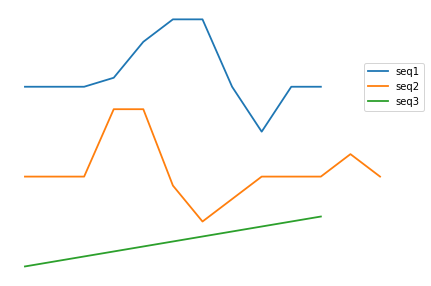

In [32]:
# Plot of sequences.
plt.plot(seq1 + 2.0, label="seq1", linewidth=1.8)
plt.plot(seq2, label="seq2", linewidth=1.8)
plt.plot(seq3 - 2.0, label="seq3", linewidth=1.8)
plt.legend(bbox_to_anchor=(0.9, 0.6))
plt.axis("off")
plt.savefig("./graphs/sequences.png")

In [33]:
# DTW distances between the sequences.
dtw_dist_13, cost_matrix_13, traceback_13 = dtw(seq1, seq3, seq1_length, seq3_length)
path_13 = traceback_path(traceback_13, seq1_length, seq3_length)

print(f"DTW Dist between seq1 and seq3 {dtw_dist_13:.3f}")

DTW Dist between seq1 and seq3 7.267


In [34]:
dtw_dist_12, cost_matrix_12, traceback_12 = dtw(seq1, seq2, seq1_length, seq2_length)
path_12 = traceback_path(traceback_12, seq1_length, seq2_length)

print(f"DTW Dist between seq1 and seq2 {dtw_dist_12:.3f}")

DTW Dist between seq1 and seq2 1.900


In [35]:
# Traceback path.
x_steps, y_steps = zip(*path_12)

x_steps = np.array(x_steps)
y_steps = np.array(y_steps)

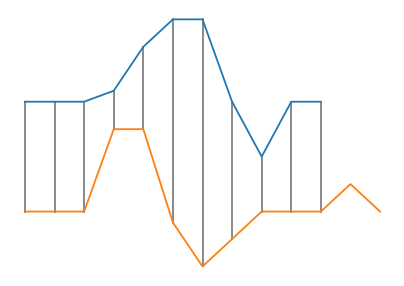

In [36]:
# Plot of traditional matching between seq1-seq2
# For two points (x1,y1) - (x2,y2)
# plt.plot([x1,x2], [y1,y2])

for i in range(min(seq1_length, seq2_length)):
    plt.plot([i, i], [seq1[i] + 2.0, seq2[i]], color="gray", linewidth=1.8)

plt.plot(seq1 + 2.0, linewidth=1.8)
plt.plot(seq2, linewidth=1.8)
plt.axis("off")
plt.savefig("./graphs/traditional_matching.png")

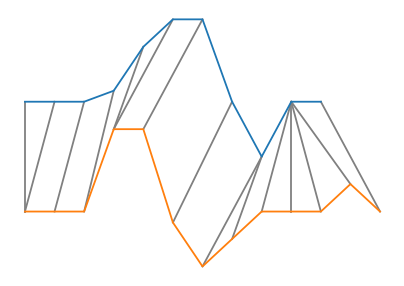

In [37]:
# DTW matching for seq1-seq2
for i in range(len(x_steps)):
    plt.plot(
        [x_steps[i], y_steps[i]],
        [seq1[x_steps[i]] + 2.0, seq2[y_steps[i]]],
        color="gray",
        linewidth=1.8,
    )

plt.plot(seq1 + 2.0, linewidth=1.8)
plt.plot(seq2, linewidth=1.8)
plt.axis("off")
plt.savefig("./graphs/dtw_matching.png")

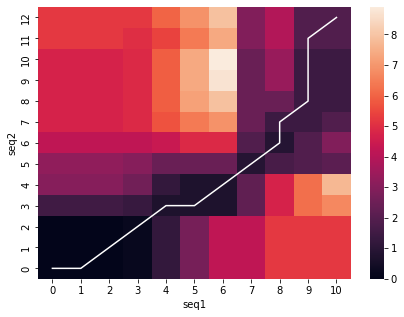

In [38]:
# Heatmap of cost matrix and warping path.

sns.color_palette("rocket_r")

ax = sns.heatmap(np.transpose(cost_matrix_12[1:, 1:]))
ax.invert_yaxis()
plt.plot(x_steps + 0.5, y_steps + 0.5, linewidth=1.5, c="w")
plt.xlabel("seq1")
plt.ylabel("seq2")
# plt.title("Heatmap of Cost Matrix + Backtracking")
plt.savefig("./graphs/heatmap.png")

In [39]:
# DTW Matching between 2 sequences on the unknown test set.

df = pd.read_csv("./dtw_test.csv").head(25)
x = df.iloc[21, :]

In [40]:
seq1_df = np.array(ast.literal_eval(x[1]))
seq2_df = np.array(ast.literal_eval(x[2]))

seq1_df_length = len(seq1_df)
seq2_df_length = len(seq2_df)

In [41]:
dtw_dist_df, cost_matrix_df, traceback_df = dtw(
    seq1_df, seq2_df, seq1_df_length, seq2_df_length
)
path_df = traceback_path(traceback_df, seq1_df_length, seq2_df_length)

print(dtw_dist_df)

x_steps_df, y_steps_df = zip(*path_df)

x_steps_df = np.array(x_steps_df)
y_steps_df = np.array(y_steps_df)

11.86119999999999


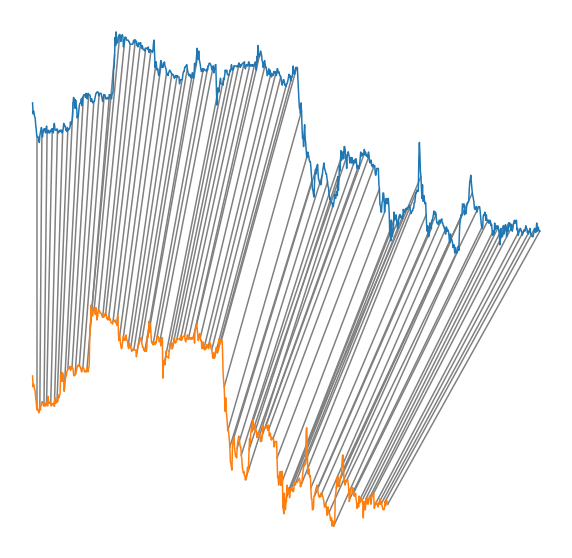

In [42]:
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(x_steps_df), 10):
    plt.plot(
        [x_steps_df[i], y_steps_df[i]],
        [seq1_df[x_steps_df[i]] + 5.0, seq2_df[y_steps_df[i]]],
        color="gray",
    )

plt.plot(seq1_df + 5.0)
plt.plot(seq2_df)
plt.axis("off")
# plt.title('Similarities using DTW Matching')
plt.savefig("./graphs/test21.jpg")